In [12]:
import os
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt

In [13]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Set output directory in Google Drive
output_dir = '/content/drive/MyDrive/Plant_synthetic/'
os.makedirs(output_dir, exist_ok=True)

In [15]:
# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

In [16]:
# Load the pre-trained diffusion model
pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipeline = pipeline.to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [17]:
# Define function to generate synthetic images
def generate_synthetic_image(prompt: str, output_path: str, seed: int = None):
    if seed:
        generator = torch.manual_seed(seed)
    else:
        generator = None

    # Generate image
    image = pipeline(prompt, guidance_scale=7.5, generator=generator).images[0]

    # Save the image
    image.save(output_path)
    print(f"Image saved to {output_path}")

    # Return the image for display
    return image

In [ ]:
# Example: Generate images for specific plant disease classes
disease_prompts = [
    "A tomato plant with healthy leaves",
    "A tomato plant affected by mosaic virus",
    "A tomato plant with yellow leaf curl virus symptoms",
    "A tomato plant showing target spots",
    "Tomato plant leaves infested with two-spotted spider mites",
    "A tomato plant with septoria leaf spot disease",
    "Tomato plant leaves affected by mold",
    "A tomato plant showing late blight symptoms",
    "A tomato plant with early blight symptoms",
]

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to /content/drive/MyDrive/Plant_synthetic/synthetic_image_1.png


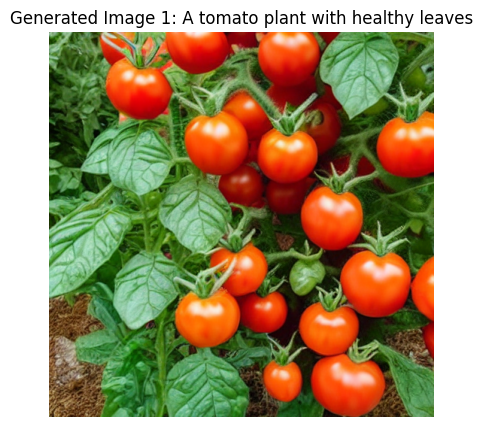

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to /content/drive/MyDrive/Plant_synthetic/synthetic_image_2.png


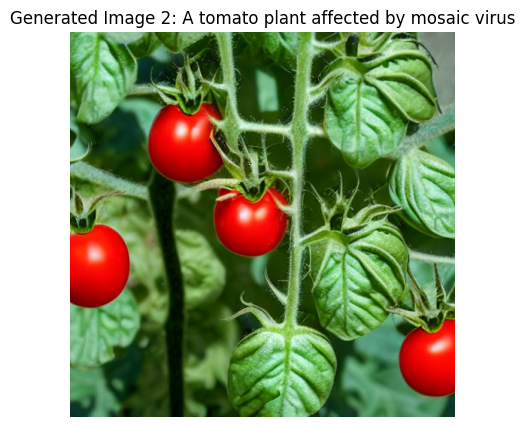

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to /content/drive/MyDrive/Plant_synthetic/synthetic_image_3.png


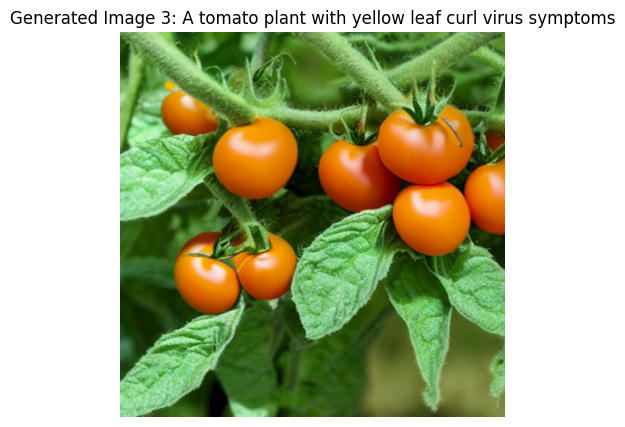

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to /content/drive/MyDrive/Plant_synthetic/synthetic_image_4.png


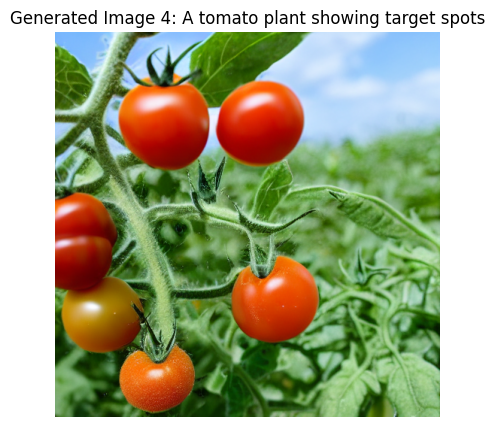

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to /content/drive/MyDrive/Plant_synthetic/synthetic_image_5.png


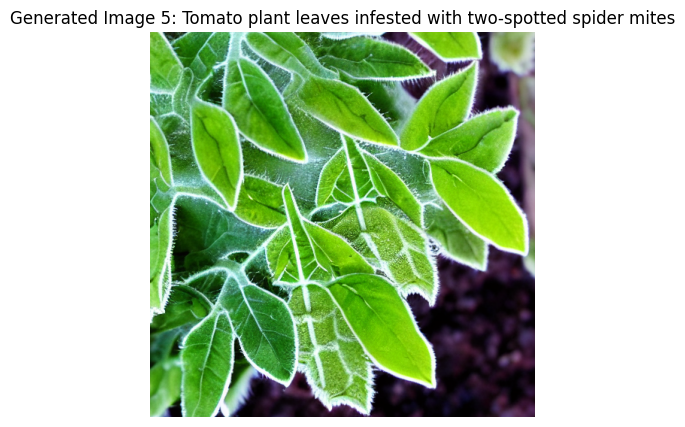

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to /content/drive/MyDrive/Plant_synthetic/synthetic_image_6.png


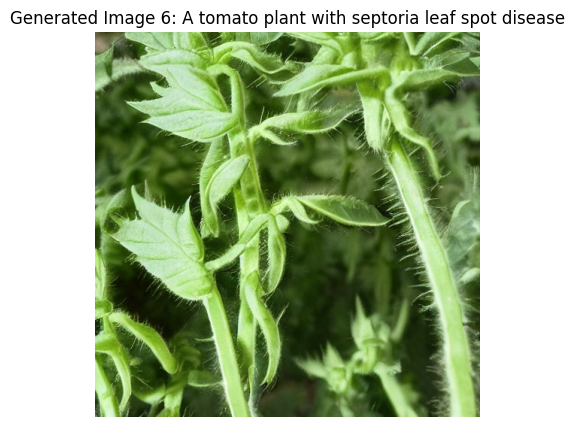

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to /content/drive/MyDrive/Plant_synthetic/synthetic_image_7.png


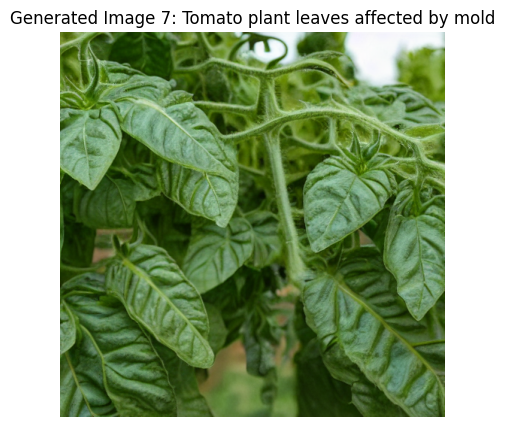

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to /content/drive/MyDrive/Plant_synthetic/synthetic_image_8.png


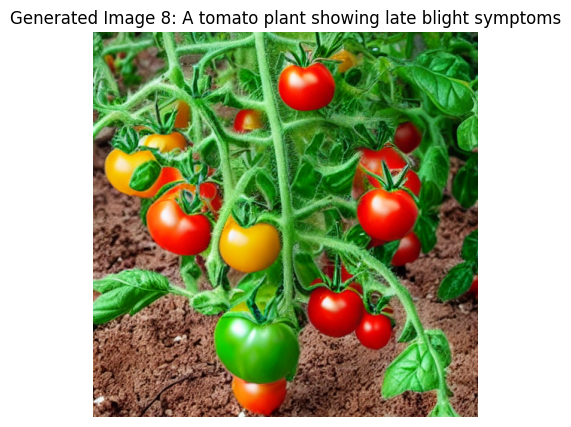

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to /content/drive/MyDrive/Plant_synthetic/synthetic_image_9.png


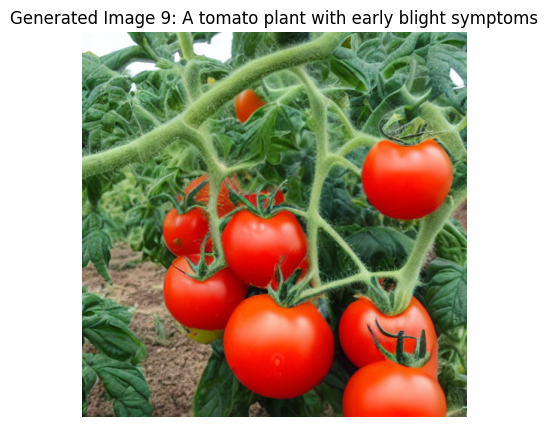

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# Generate images for each class and display them
for i, prompt in enumerate(disease_prompts):
    output_file = os.path.join(output_dir, f"synthetic_image_{i+1}.png")
    generated_image = generate_synthetic_image(prompt, output_file)

    # Display the generated image
    plt.figure(figsize=(5, 5))
    plt.imshow(generated_image)
    plt.axis("off")
    plt.title(f"Generated Image {i+1}: {prompt}")
    plt.show()

In [18]:
disease_pt2 = [
    "Tomato plant leaves with bacterial spot",
    "A healthy pepper bell plant",
    "A pepper bell plant with bacterial spot disease"
]

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to /content/drive/MyDrive/Plant_synthetic/synthetic_image_10.png


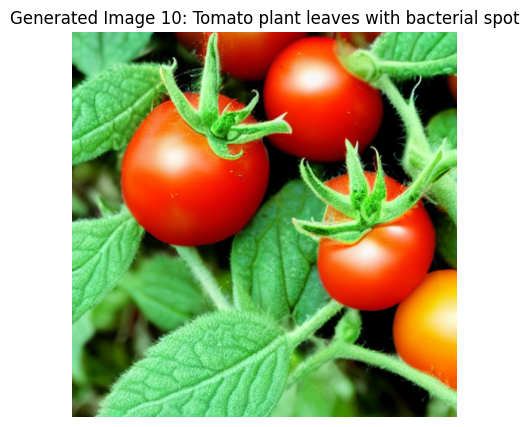

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to /content/drive/MyDrive/Plant_synthetic/synthetic_image_11.png


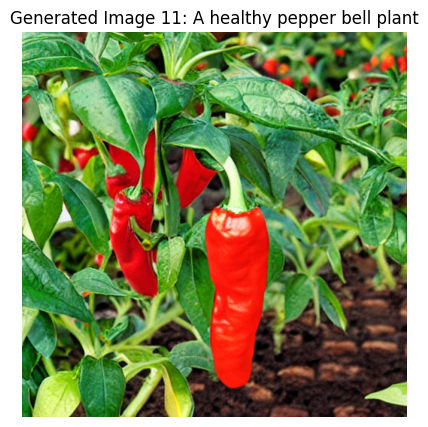

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to /content/drive/MyDrive/Plant_synthetic/synthetic_image_12.png


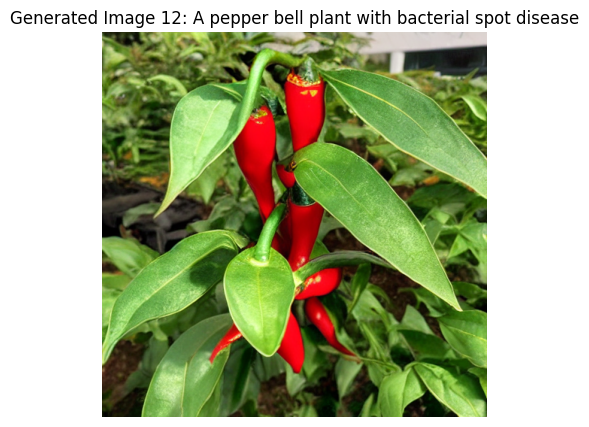

In [11]:
# Generate images for each class and display them
starting_index = 10  # Start numbering from 10
for j, prompt in enumerate(disease_pt2, start=starting_index):
    output_file = os.path.join(output_dir, f"synthetic_image_{j}.png")
    generated_image_pt2 = generate_synthetic_image(prompt, output_file)

    # Display the generated image
    plt.figure(figsize=(5, 5))
    plt.imshow(generated_image_pt2)
    plt.axis("off")
    plt.title(f"Generated Image {j}: {prompt}")
    plt.show()